In [40]:
import keras as keras
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [41]:
pd.set_option('display.width', 500)
np.set_printoptions(linewidth=500)
pd.set_option('display.max_columns', 10)

df = pd.read_csv(
    "../../dataset_building/oslo_citybike_dataset_preprocessed.csv",
    index_col=False
)

df.shape

df.head()

,station_lat,station_lon,is_installed,is_renting,is_returning,...,record_timestamp_second_34,record_timestamp_second_36,record_timestamp_second_43,record_timestamp_second_46,record_timestamp_second_59
0,0.599163,0.107574,0,0,0,...,1,0,0,0,0
1,0.599132,0.107500,0,0,0,...,1,0,0,0,0
2,0.599127,0.107272,0,0,0,...,1,0,0,0,0
3,0.599125,0.107509,0,0,0,...,1,0,0,0,0
4,0.599069,0.107603,0,0,0,...,1,0,0,0,0


In [42]:
# 30% of data for testing
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1556 667


In [43]:
feature_columns = list(df.columns)
feature_columns.remove('bike_availability_ratio')

f_columns = feature_columns
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
    train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
    test[f_columns].to_numpy()
)

bike_availability_col = ['bike_availability_ratio']
availability_transformer = RobustScaler()
availability_transformer = availability_transformer.fit(train[bike_availability_col])
train.loc[:, bike_availability_col] = availability_transformer.transform(
    train[bike_availability_col]
)
test.loc[:, bike_availability_col] = availability_transformer.transform(
    test[bike_availability_col]
)

C:\Users\teoma\PycharmProjects\RealtimePredictionBikeTerminalAvailability\venv\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\teoma\PycharmProjects\RealtimePredictionBikeTerminalAvailability\venv\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\teoma\PycharmProjects\RealtimePredictio

In [44]:
print("feature columns: ")
feature_columns

feature columns: 


['station_lat',
 'station_lon',
 'is_installed',
 'is_renting',
 'is_returning',
 'record_timestamp_year_2022',
 'record_timestamp_month_1',
 'record_timestamp_day_19',
 'record_timestamp_hour_14',
 'record_timestamp_hour_15',
 'record_timestamp_minute_0',
 'record_timestamp_minute_11',
 'record_timestamp_minute_16',
 'record_timestamp_minute_18',
 'record_timestamp_minute_19',
 'record_timestamp_minute_21',
 'record_timestamp_minute_26',
 'record_timestamp_minute_31',
 'record_timestamp_minute_36',
 'record_timestamp_second_24',
 'record_timestamp_second_26',
 'record_timestamp_second_30',
 'record_timestamp_second_33',
 'record_timestamp_second_34',
 'record_timestamp_second_36',
 'record_timestamp_second_43',
 'record_timestamp_second_46',
 'record_timestamp_second_59']

In [45]:
print("train: ")
train

train: 


,station_lat,station_lon,is_installed,is_renting,is_returning,...,record_timestamp_second_34,record_timestamp_second_36,record_timestamp_second_43,record_timestamp_second_46,record_timestamp_second_59
0,-0.288829,0.254495,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
1,-0.482999,0.053213,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
2,-0.515984,-0.565129,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
3,-0.528061,0.079029,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
4,-0.883244,0.334138,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1551,-0.421890,-0.138791,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1552,0.099759,0.201602,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1553,-0.517789,-0.681008,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1554,-0.626220,-0.550768,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0


In [46]:
print("test: ")
test

test: 


,station_lat,station_lon,is_installed,is_renting,is_returning,...,record_timestamp_second_34,record_timestamp_second_36,record_timestamp_second_43,record_timestamp_second_46,record_timestamp_second_59
1556,0.814669,0.106699,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1557,-0.575358,-0.349621,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1558,0.800551,-0.588911,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1559,-0.464644,-0.485482,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
1560,-0.446058,1.359326,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2218,-0.328705,0.802338,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2219,-1.103030,0.812961,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2220,-0.344510,0.578850,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2221,0.676949,0.384533,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [47]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [48]:
time_steps = 10
X_train, y_train = create_dataset(train, train.bike_availability_ratio, time_steps)
X_test, y_test = create_dataset(test, test.bike_availability_ratio, time_steps)
print(X_train.shape, y_train.shape)

(1546, 10, 29) (1546,)


In [49]:
X_train

array([[[-0.28882894,  0.25449463,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [-0.48299933,  0.0532127 ,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [-0.51598435, -0.56512912,  0.        , ...,  0.        ,  0.        ,  0.        ],
        ...,
        [ 1.60817633, -0.63417348,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [ 0.63724854,  1.46369513,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [ 0.43717693,  0.36002397,  0.        , ...,  0.        ,  0.        ,  0.        ]],

       [[-0.48299933,  0.0532127 ,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [-0.51598435, -0.56512912,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [-0.52806055,  0.07902917,  0.        , ...,  0.        ,  0.        ,  0.        ],
        ...,
        [ 0.63724854,  1.46369513,  0.        , ...,  0.        ,  0.        ,  0.        ],
        [ 0.43717693,  0.36002397,  0.    

In [50]:
X_test

array([[[ 0.81466944,  0.10669872,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [-0.57535805, -0.34962118,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [ 0.80055086, -0.58891079,  0.        , ...,  1.        ,  0.        ,  0.        ],
        ...,
        [ 1.59141574, -1.02041608,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [-0.22398336, -0.84357873,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [ 0.19310251, -1.9527098 ,  0.        , ...,  1.        ,  0.        ,  0.        ]],

       [[-0.57535805, -0.34962118,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [ 0.80055086, -0.58891079,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [-0.4646442 , -0.48548163,  0.        , ...,  1.        ,  0.        ,  0.        ],
        ...,
        [-0.22398336, -0.84357873,  0.        , ...,  1.        ,  0.        ,  0.        ],
        [ 0.19310251, -1.9527098 ,  0.    

In [51]:
y_train

array([0.        , 1.        , 0.        , ..., 0.        , 0.        , 1.66666667])

In [52]:
y_test

array([0.76923077, 0.        , 0.        , 0.        , 0.        , 1.8       , 0.71428571, 0.        , 1.5       , 0.5       , 0.        , 0.        , 0.        , 0.71428571, 0.625     , 0.        , 2.        , 0.83333333, 0.        , 2.        , 0.        , 0.        , 0.        , 0.71428571, 0.        , 0.83333333, 0.        , 0.375     , 0.        , 0.        , 0.        , 1.66666667, 1.25      , 0.        , 0.        , 1.66666667, 1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.35714286, 0.71428571, 0.625     , 0.83333333, 0.83333333, 1.        , 1.28571429, 1.66666667, 0.        , 0.        , 2.14285714, 0.        , 0.        , 0.        , 0.        , 0.        , 0.83333333, 0.        , 0.        , 0.        , 0.        , 0.75      , 0.        , 1.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.625     , 2.14285714,
  

In [53]:
model = keras.Sequential()
model.add(
    keras.layers.LSTM(
        units=50,
        dropout=0.5,
        recurrent_dropout=0.2,
        input_shape=(X_train.shape[1], X_train.shape[2])
    )
)

model.add(keras.layers.Dense(units=1, activation="linear"))

model.compile(loss='mse', optimizer='rmsprop',metrics=[tf.keras.losses.MeanSquaredError(),'mae'])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
44/44 [==============================] - 3s 14ms/step - loss: 0.8633 - mean_squared_error: 0.8572 - mae: 0.6670 - val_loss: 1.0708 - val_mean_squared_error: 1.0608 - val_mae: 0.6862
Epoch 2/20
44/44 [==============================] - 0s 8ms/step - loss: 0.8211 - mean_squared_error: 0.8157 - mae: 0.6800 - val_loss: 1.0707 - val_mean_squared_error: 1.0608 - val_mae: 0.6791
Epoch 3/20
44/44 [==============================] - 0s 7ms/step - loss: 0.8117 - mean_squared_error: 0.8071 - mae: 0.6766 - val_loss: 1.0595 - val_mean_squared_error: 1.0503 - val_mae: 0.6777
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 0.8021 - mean_squared_error: 0.7968 - mae: 0.6752 - val_loss: 1.0452 - val_mean_squared_error: 1.0356 - val_mae: 0.6818
Epoch 5/20
44/44 [==============================] - 0s 8ms/step - loss: 0.7997 - mean_squared_error: 0.7945 - mae: 0.6733 - val_loss: 1.0410 - val_mean_squared_error: 1.0313 - val_mae: 0.6825
Epoch 6/20
44/44 [=====================

In [54]:
np.abs(model.evaluate(X_train, y_train)[1]-model.evaluate(X_test, y_test)[1])

21/21 [==============================] - 0s 2ms/step - loss: 0.6981 - mean_squared_error: 0.6917 - mae: 0.6046


0.0627676248550415

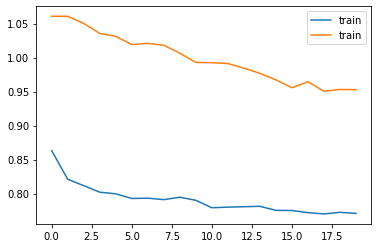

In [55]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='train')
plt.legend();

In [56]:
y_pred = model.predict(X_test)

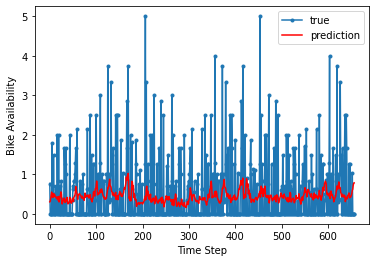

In [57]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Bike Availability')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [58]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput="uniform_average"))

Mean Absolute Error: 0.6045798879391192
